In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures


from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB



from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix)

from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('max_colwidth', 800)

In [3]:
df = pd.read_csv('../data/clean_data.csv')

In [4]:
df.head()

,Unnamed: 0,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [5]:
# Dropping Unnamed column

df = df.drop('Unnamed: 0', axis = 1)

df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [6]:
# Imablanced classes will be handles with SMOTE below after defining X and y.

In [7]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [8]:
df['stroke'].value_counts(normalize='True')

0    0.951272
1    0.048728
Name: stroke, dtype: float64

### Modeling

In [9]:
X= df.drop(columns = 'stroke') 
y= df['stroke']

#### Polynomial Features

In [10]:
poly = PolynomialFeatures(degree=3)
X = poly.fit_transform(X)

In [11]:
# Created 969 columns
X.shape

(5110, 969)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=42,
                                                    stratify = y)

In [13]:
y_train.value_counts()

0    3645
1     187
Name: stroke, dtype: int64

In [14]:
y_test.value_counts()

0    1216
1      62
Name: stroke, dtype: int64

#### Naive Bayes

In [15]:
nb_pipe = make_pipeline(SMOTE(random_state=42), MultinomialNB())

nb_pipe_params = {
    'multinomialnb__alpha': [1, 1.5, 2]
}

nb_gs = GridSearchCV(nb_pipe, param_grid = nb_pipe_params, n_jobs=-1)

In [16]:
nb_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1, param_grid={'multinomialnb__alpha': [1, 1.5, 2]})

In [17]:
nb_gs.score(X_train, y_train)

0.7267745302713987

In [18]:
nb_gs.score(X_test, y_test)

0.7167449139280125

In [19]:
nb_gs.best_params_

{'multinomialnb__alpha': 1}

#### kNN Classifer

In [24]:
knn_pipe = make_pipeline(SMOTE(random_state=42), StandardScaler(with_mean=False), KNeighborsClassifier())

knn_pipe_params = {
    'kneighborsclassifier__n_neighbors':[7,8,9]
}

knn_gs = GridSearchCV(knn_pipe, param_grid = knn_pipe_params, n_jobs=-1)

In [26]:
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [7, 8, 9]})

In [27]:
knn_gs.score(X_train, y_train)

0.9180584551148225

In [28]:
knn_gs.score(X_test, y_test)

0.8356807511737089

In [29]:
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 8}

#### Random Forrest

In [30]:
rf_pipe = make_pipeline(SMOTE(random_state=42), RandomForestClassifier())


rf_pipe_params = {
    'randomforestclassifier__n_estimators': [5, 10, 20, 30],
    'randomforestclassifier__max_depth': [3, 4, 5, 6, 7],
    'randomforestclassifier__min_samples_leaf': [1],
    'randomforestclassifier__random_state': [42]
}

In [31]:
rf_pipe.named_steps

{'smote': SMOTE(random_state=42),
 'randomforestclassifier': RandomForestClassifier()}

In [32]:
rf_gs = GridSearchCV(rf_pipe, param_grid = rf_pipe_params, n_jobs=-1)

In [33]:
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [3, 4, 5, 6, 7],
                         'randomforestclassifier__min_samples_leaf': [1],
                         'randomforestclassifier__n_estimators': [5, 10, 20,
                                                                  30],
                         'randomforestclassifier__random_state': [42]})

In [34]:
rf_gs.score(X_train, y_train)

0.9611169102296451

In [35]:
rf_gs.score(X_test, y_test)

0.9436619718309859

In [36]:
rf_gs.best_params_

{'randomforestclassifier__max_depth': 7,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__n_estimators': 30,
 'randomforestclassifier__random_state': 42}

#### Logistic Regression

In [37]:
lr_pipe = make_pipeline(SMOTE(random_state=42), StandardScaler(with_mean=False), LogisticRegression(penalty ='l2'))


lr_pipe_params = {
    'logisticregression__C':[.1, 1, 2, 3, 4],
}

lr_gs = GridSearchCV(lr_pipe, param_grid = lr_pipe_params, n_jobs=-1)

In [39]:
lr_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1, 2, 3, 4]})

In [40]:
lr_gs.score(X_train, y_train)

0.8549060542797495

In [41]:
lr_gs.score(X_test, y_test)

0.8043818466353677

In [42]:
lr_gs.best_params_

{'logisticregression__C': 4}

#### Looking into features

In [155]:
pd.DataFrame(list(zip(lr_gs.best_estimator_.named_steps["logisticregression"].coef_[0], poly.get_feature_names_out()))).sort_values(by = 0, ascending = False)

,0,1
1,2.570279,age
432,2.548867,heart_disease avg_glucose_level Residence_type_Urban
327,2.310457,hypertension avg_glucose_level Residence_type_Urban
320,2.078541,hypertension avg_glucose_level gender_Male
329,1.669214,hypertension avg_glucose_level smoking_status_never smoked
...,...,...
168,-1.772758,age^2 smoking_status_smokes
324,-1.820886,hypertension avg_glucose_level work_type_Private
4,-1.915478,avg_glucose_level
676,-2.053985,bmi Residence_type_Urban smoking_status_smokes


#### ADA Boost

In [98]:
boost_pipe = make_pipeline(SMOTE(random_state=42), AdaBoostClassifier())

boost_pipe_params = {
    'adaboostclassifier__n_estimators': [140],
    'adaboostclassifier__base_estimator':[RandomForestClassifier(max_depth=7, min_samples_leaf=1, n_estimators=30)],

}

boost_gs = GridSearchCV(boost_pipe, param_grid = boost_pipe_params, n_jobs=-1)

In [100]:
boost_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'adaboostclassifier__base_estimator': [RandomForestClassifier(max_depth=7,
                                                                                       n_estimators=30)],
                         'adaboostclassifier__n_estimators': [140]})

In [101]:
boost_gs.score(X_train, y_train)

1.0

In [102]:
boost_gs.score(X_test, y_test)

0.9397496087636933

In [103]:
boost_gs.best_params_

{'adaboostclassifier__base_estimator': RandomForestClassifier(max_depth=7, n_estimators=30),
 'adaboostclassifier__n_estimators': 140}

#### Stacked

In [51]:
level1_estimators = [
    ('knn', knn_gs.best_estimator_),
    ('rf', rf_gs.best_estimator_),
    ('boost', boost_gs.best_estimator_)
]

stacked_model = StackingClassifier(estimators=level1_estimators,
                                 final_estimator = LogisticRegression())

In [52]:
stacked_model.fit(X_train, y_train)

StackingClassifier(estimators=[('knn',
                                Pipeline(steps=[('smote',
                                                 SMOTE(random_state=42)),
                                                ('standardscaler',
                                                 StandardScaler(with_mean=False)),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier(n_neighbors=8))])),
                               ('rf',
                                Pipeline(steps=[('smote',
                                                 SMOTE(random_state=42)),
                                                ('randomforestclassifier',
                                                 RandomForestClassifier(max_depth=7,
                                                                        n_estimators=30,
                                                                        random_state=42))])),
                               ('boost',
                                Pipeline(steps=[('smote',
                                                 SMOTE(random_state=42)),
                                                ('adaboostclassifier',
                                                 AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=4,
                                                                                                          n_estimators=5),
                                                                    n_estimators=120))]))],
                   final_estimator=LogisticRegression())

In [53]:
stacked_model.score(X_train, y_train)

0.951722338204593

In [54]:
stacked_model.score(X_test, y_test)

0.9514866979655712

## Score Analysis

#### Naive Bayes 

In [20]:
preds1 = nb_gs.predict(X_test)

In [21]:
cm = confusion_matrix(y_test, preds1, labels= nb_gs.classes_)

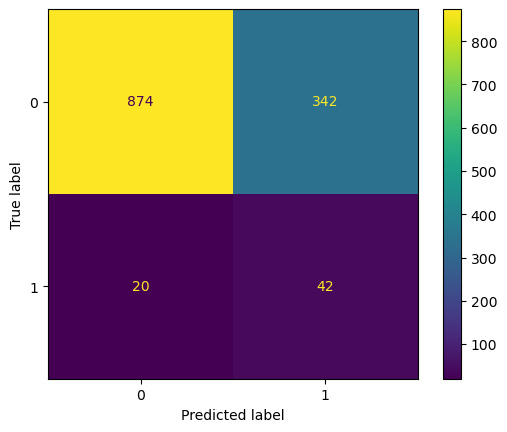

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=nb_gs.classes_,
                             );

disp.plot();

plt.savefig('../images/polybayes_confusion.png')

In [23]:
    acc = accuracy_score(y_test, preds1)
    recall = recall_score(y_test, preds1)
    prec = precision_score(y_test, preds1)
    f1 = f1_score(y_test, preds1)

    print(f'accuracy: {acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

accuracy: 0.7167449139280125
recall: 0.6774193548387096
precision: 0.109375
f1 score: 0.18834080717488788


#### KNN Neighbors

In [80]:
preds2 = knn_gs.predict(X_test)

In [81]:
cm = confusion_matrix(y_test, preds2, labels= knn_gs.classes_)

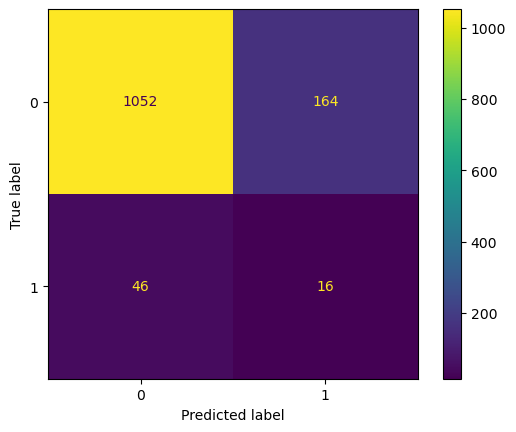

In [82]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=knn_gs.classes_,
                             );

disp.plot();

In [122]:
    acc = accuracy_score(y_test, preds2)
    recall = recall_score(y_test, preds2)
    prec = precision_score(y_test, preds2)
    f1 = f1_score(y_test, preds2)

    print(f'accuracy: {acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

accuracy: 0.8356807511737089
recall: 0.25806451612903225
precision: 0.08888888888888889
f1 score: 0.1322314049586777


#### Random Forrest

In [84]:
preds3 = rf_gs.predict(X_test)

In [85]:
cm = confusion_matrix(y_test, preds3, labels= rf_gs.classes_)

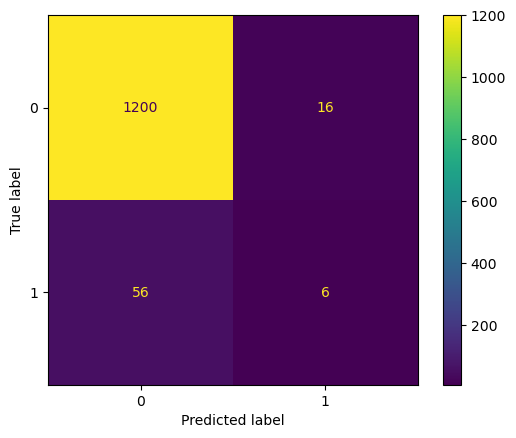

In [86]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=rf_gs.classes_,
                             );

disp.plot();

In [123]:
    acc = accuracy_score(y_test, preds3)
    recall = recall_score(y_test, preds3)
    prec = precision_score(y_test, preds3)
    f1 = f1_score(y_test, preds3)

    print(f'accuracy: {acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

accuracy: 0.9436619718309859
recall: 0.0967741935483871
precision: 0.2727272727272727
f1 score: 0.14285714285714285


#### Logistic Regression

In [88]:
preds4 = lr_gs.predict(X_test)

In [89]:
cm = confusion_matrix(y_test, preds4, labels= lr_gs.classes_)

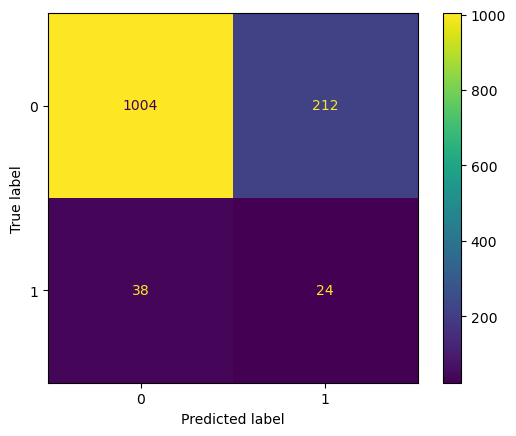

In [90]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=lr_gs.classes_,
                             );

disp.plot();

In [124]:
    acc = accuracy_score(y_test, preds4)
    recall = recall_score(y_test, preds4)
    prec = precision_score(y_test, preds4)
    f1 = f1_score(y_test, preds4)

    print(f'accuracy: {acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

accuracy: 0.8043818466353677
recall: 0.3870967741935484
precision: 0.1016949152542373
f1 score: 0.16107382550335572


#### ADA Boost

In [104]:
preds5 = boost_gs.predict(X_test)

In [106]:
cm = confusion_matrix(y_test, preds5, labels= boost_gs.classes_)

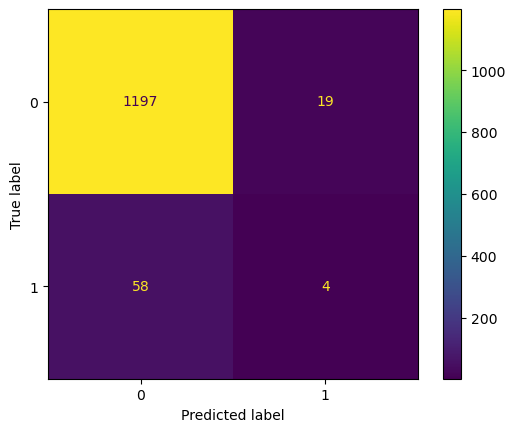

In [108]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=boost_gs.classes_,
                             );

disp.plot();

In [126]:
    acc = accuracy_score(y_test, preds5)
    recall = recall_score(y_test, preds5)
    prec = precision_score(y_test, preds5)
    f1 = f1_score(y_test, preds5)

    print(f'accuracy: {acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

accuracy: 0.9397496087636933
recall: 0.06451612903225806
precision: 0.17391304347826086
f1 score: 0.09411764705882353


#### Stacked

In [127]:
preds6 = stacked_model.predict(X_test)

In [128]:
cm = confusion_matrix(y_test, preds6, labels= stacked_model.classes_)

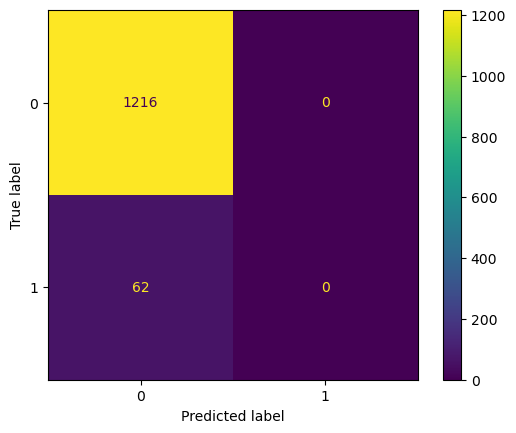

In [129]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=stacked_model.classes_,
                             );

disp.plot();

In [130]:
    acc = accuracy_score(y_test, preds6)
    recall = recall_score(y_test, preds6)
    prec = precision_score(y_test, preds6)
    f1 = f1_score(y_test, preds6)

    print(f'accuracy: {acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

accuracy: 0.9514866979655712
recall: 0.0
precision: 0.0
f1 score: 0.0
